# Practica 1 - Muestreo, cuantificación, señales análogas y digitales

**Author:** Cristian David Araujo A.

**ID:** 1089568350

**Date:** 21/08/2024



## Muestreo

### 1. Cargue la señal correspondiente al ultimo número de su cédula. Con base en el número total de muestras y a la frecuencia de muestreo, grafique la señal en función del tiempo.

/tmp/ipykernel_58504/2218810589.py:8: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, data = wavfile.read('0.wav')


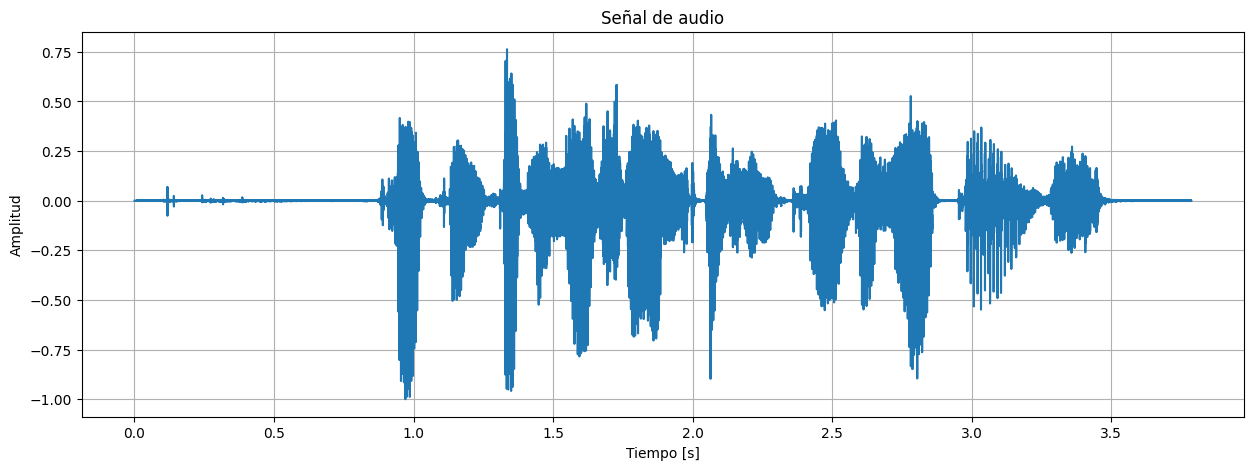

In [10]:
### 1. Cargue la señal correspondiente al ultimo número de su cédula. Con base en el número total de muestras y a la frecuencia de muestreo, grafique la señal en función del tiempo.
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from IPython.display import Audio

# Cargar archivo de audio
fs, data = wavfile.read('0.wav')
t = np.arange(0, len(data)/fs, 1/fs)

#normalizar la señal
data = data/np.max(abs(data))

# Graficar
plt.figure(figsize=(15, 5))
plt.plot(t, data)
plt.title('Señal de audio')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid()
plt.show()

#Escuchar la señal
Audio(data, rate=fs)

### 2. Genere un nuevo archivo de audio con la misma señal pero al doble y luego con la mitad de la frecuencia de muestreo original. Escuche el audio, ¿Qué diferencia nota? ¿A que se debe esto?. Tip: Para generar el archivo utilice las siguientes lı́neas:

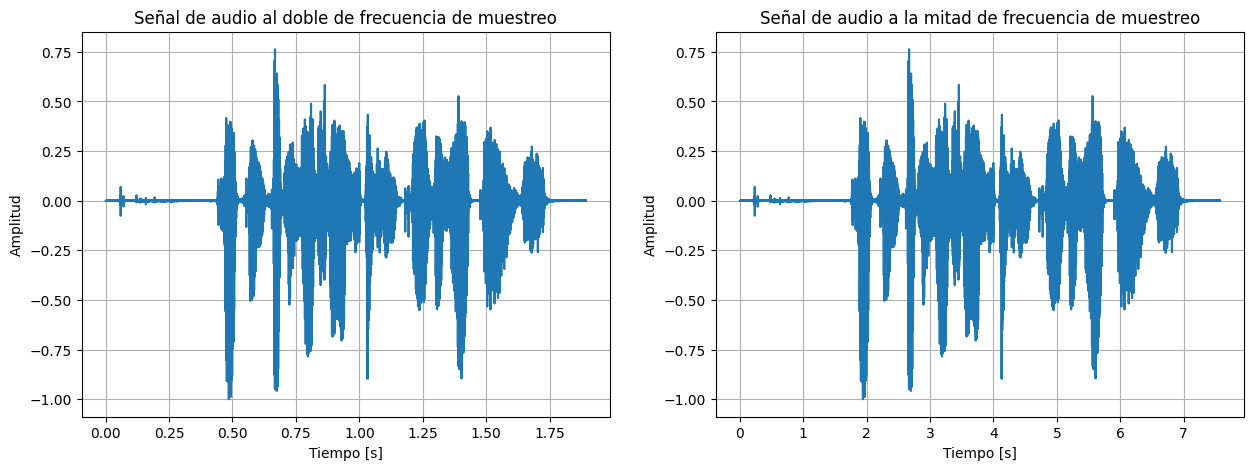

Señal original


Señal al doble de frecuencia de muestreo


In [11]:
### 2. Genere un nuevo archivo de audio con la misma señal pero al doble y luego con la mitad de la frecuencia de muestreo original. Escuche el audio, ¿Qué diferencia nota? ¿A que se debe esto?. Tip: Para generar el archivo utilice las siguientes lı́neas:

from scipy . io . wavfile import write
write ( '0_doble.wav' , int(2*fs) , data )
write ( '0_mitad.wav' , int(fs /2) , data )

#Graficar las nuevas señales
fs_doble, data_doble = wavfile.read('0_doble.wav')
t_doble = np.arange(0, len(data_doble)/fs_doble, 1/fs_doble)
data_doble = data_doble/np.max(abs(data_doble))

fs_mitad, data_mitad = wavfile.read('0_mitad.wav')
t_mitad = np.arange(0, len(data_mitad)/fs_mitad, 1/fs_mitad)
data_mitad = data_mitad/np.max(abs(data_mitad))

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(t_doble, data_doble)
plt.title('Señal de audio al doble de frecuencia de muestreo')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(t_mitad, data_mitad)
plt.title('Señal de audio a la mitad de frecuencia de muestreo')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid()
plt.show()

#Escuchar las nuevas señales
print('Señal original')
display(Audio(data, rate=fs))
print('Señal al doble de frecuencia de muestreo')
display(Audio(data_doble, rate=fs_doble))


Conclusiones

Al escuchar las nuevas señales generadas a partir de la señal original, se puede notar que la señal con el doble de frecuencia de muestreo reduce su tiempo de duración, mientras que la señal con la mitad de la frecuencia de muestreo aumenta su tiempo de duración. Esto se debe a que la frecuencia de muestreo es la cantidad de muestras que se toman por segundo para representar la señal, por lo que al aumentar la frecuencia de muestreo se toman más muestras en el mismo intervalo de tiempo, lo que reduce la duración de la señal, y al disminuir la frecuencia de muestreo se toman menos muestras en el mismo intervalo de tiempo, lo que aumenta la duración de la señal. Al aumentar la frecuencia de muestre el audio se escucha más agudo y por el contrario, al recudir la frecuencia se escucha más grave.

### 3. Sub-muestree la señal usando un cuarto de la frecuencia de muestreo original. Reproduzca la señal resultantey la original, con sus respectivas frecuencias de muestreo. Grafique ambas señales en la misma figura. ¿Que puede concluir? Tip: use las siguientes instrucciones para el sub-muestreo:

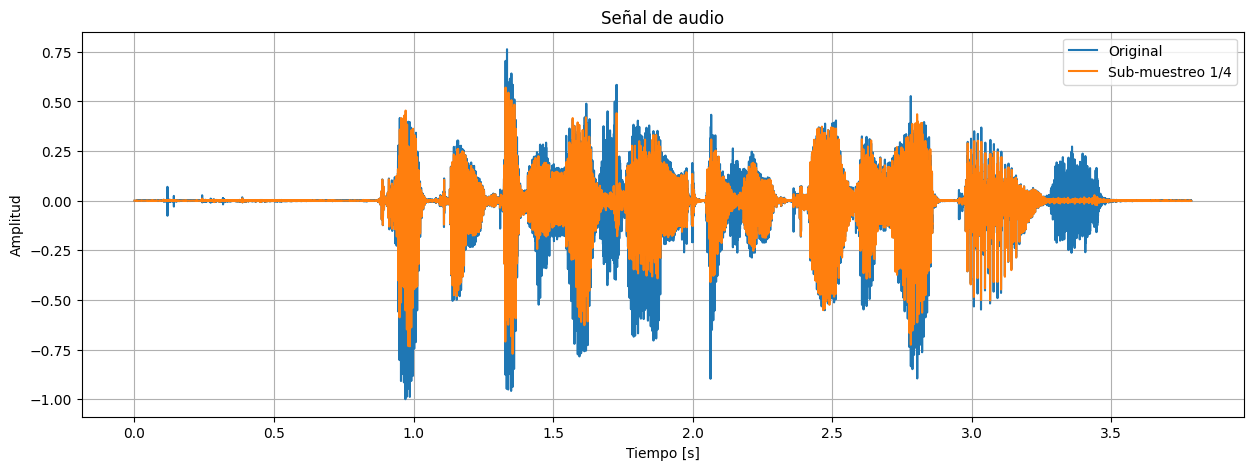

Audio original


Audio sub-muestreo 1/4


In [13]:
### 3. Sub-muestree la señal usando un cuarto de la frecuencia de muestreo original. Reproduzca la señal resultantey la original, con sus respectivas frecuencias de muestreo. Grafique ambas señales en la misma figura. ¿Que puede concluir? Tip: use las siguientes instrucciones para el sub-muestreo:
from scipy . signal import resample
import numpy as np

data_sub1a4 = resample(data , int (len (data)/4))
fs_sub1a4 = fs/4
t_sub1a4 = np.arange(0, len(data_sub1a4)/fs_sub1a4, 1/fs_sub1a4)

#Graficar las nuevas señales
plt.figure(figsize=(15, 5))
plt.plot(t, data, label='Original')
plt.plot(t_sub1a4, data_sub1a4, label='Sub-muestreo 1/4')
plt.title('Señal de audio')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()
plt.show()

#Escuchar las nuevas señales
print('Audio original')
display(Audio(data, rate=fs, element_id='audio_original'))
print('Audio sub-muestreo 1/4')
display(Audio(data_sub1a4, rate=fs_sub1a4, element_id='audio_sub1a4'))

Conclusión

Al sub-muestrear la señal, se pierde información de la señal original, lo que se traduce en una señal con menos calidad y menos fidelidad a la señal original. En este caso, al sub-muestrear la señal a 1/4 de la frecuencia de muestreo original, se puede observar que la señal resultante es más "plana" y pierde detalles en comparación con la señal original, lo que se traduce en una señal con menos calidad de audio. La información principal de la señal original se mantiene, pero se pierden detalles y matices que estaban presentes en la señal original, en este caso, los agudos se ven afectados ya que la frecuencia de muestreo es menor.

## Frecuencia de Nyquist y Aliasing

### 1. Genere una señal sinusoidal con una frecuencia de 4 Hz y una frecuencia de muestreo de 50 Hz. Genere otra señal sinusoidal de frecuencia 4 Hz y muestréela según el teorema de Nyquist. Grafique las señales en la misma figura y mostrando 2 perı́odos de estas. ¿Qué diferencias encuentras?

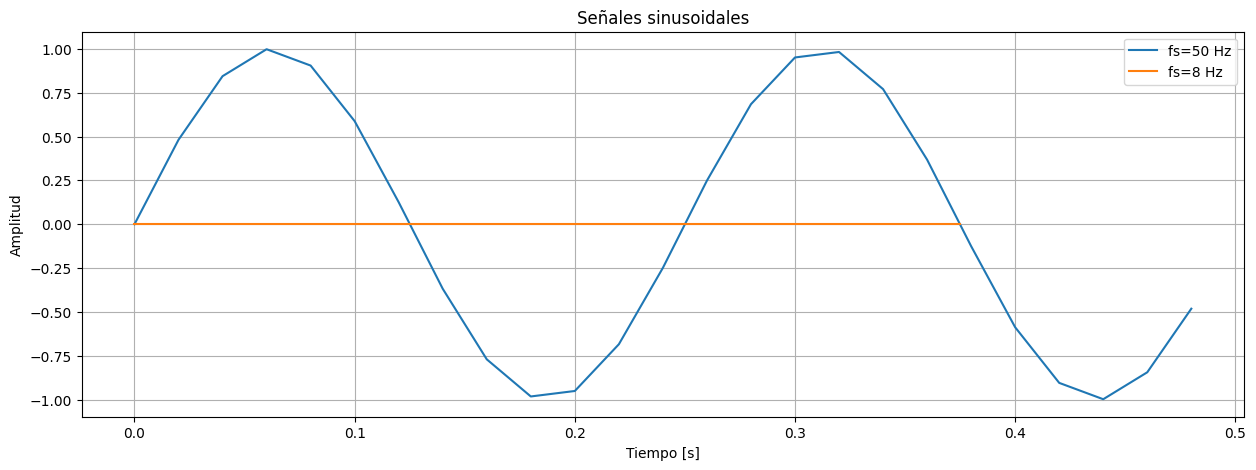

In [12]:
### 1. Genere una señal sinusoidal con una frecuencia de 4 Hz y una frecuencia de muestreo de 50 Hz. Genere otra señal sinusoidal de frecuencia 4 Hz y muestréela según el teorema de Nyquist. Grafique las señales en la misma figura y mostrando 2 perı́odos de estas. ¿Qué diferencias encuentras?

# Parámetros
f1 = 4 # Frecuencia de la señal
fs1 = 50 # Frecuencia de muestreo

f2 = 4 # Frecuencia de la señal
fs2 = 2*f2 # Frecuencia de muestreo (Nyquist mínimo)

# Señales
t1 = np.arange(0, 2*(1/f1), 1/fs1)
data1 = np.sin(2*np.pi*f1*t1)

t2 = np.arange(0, 2*(1/f2), 1/fs2)
data2 = np.sin(2*np.pi*f2*t2)

# Graficar las señales
plt.figure(figsize=(15, 5))
plt.plot(t1, data1, label='fs=50 Hz')
plt.plot(t2, data2, label='fs=8 Hz')
plt.title('Señales sinusoidales')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()
plt.show()



Conclusión

La señal muestreada a 50 Hz tiene una frecuencia de muestreo mayor a la frecuencia de la señal, por lo que se puede observar claramente la forma de la señal original. Por otro lado, la señal muestreada a 8 Hz tiene una frecuencia de muestreo menor a la frecuencia de la señal, por lo que se puede observar que la señal original no se puede reconstruir correctamente, ya que no se toman suficientes muestras para representar la señal original. Ya que el teorema Niquist establece que la frecuencia de muestreo debe ser al menos el doble de la frecuencia de la señal para poder reconstruir la señal original, en este caso la señal muestreada a 8 Hz solo cumple con el minimo y ademas cada punto está coincidiendo con puntos donde la señal tiene un valor de cero.

### 2. Escriba un código que genere dos señales sinusoidales muestreadas con una frecuencia f s = (n + 1) ∗ 22 Hz. La señal 1 tendrá una frecuencia f1 = (n + 1) Hz y la señal 2 tendrá una frecuencia f2 = 2 ∗ f s + (n + 2) Hz. Tome n como ultimo dı́gito de su cédula. ¿Ambas señales quedan bien representadas? ¿A que se debe esto?.

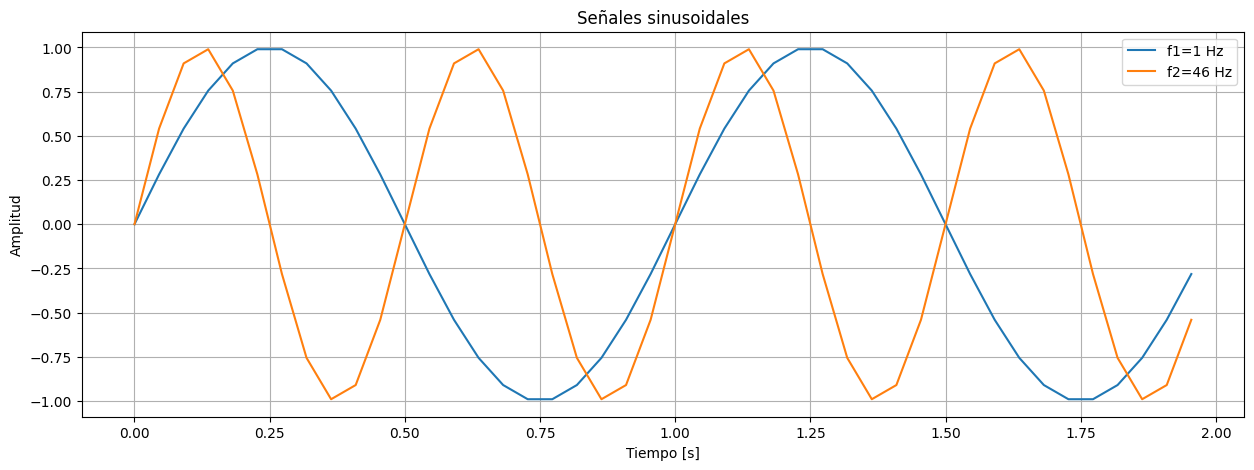

In [14]:
### 2. Escriba un código que genere dos señales sinusoidales muestreadas con una frecuencia f s = (n + 1) ∗ 22 Hz. La señal 1 tendrá una frecuencia f1 = (n + 1) Hz y la señal 2 tendrá una frecuencia f2 = 2 ∗ f s + (n + 2) Hz. Tome n como ultimo dı́gito de su cédula. ¿Ambas señales quedan bien representadas? ¿A que se debe esto?.

# Parámetros
n = 0 # Último dígito de la cédula
fs = (n + 1)*22 # Frecuencia de muestreo
f1 = (n + 1) # Frecuencia de la señal 1
f2 = 2*fs + (n + 2) # Frecuencia de la señal 2

#Seleccionar 2 periodos de la señal con menor frecuencia
max_t = 2*(1/f1) if 1/f1 > 1/f2 else 2*(1/f2)

# Señales
t1 = np.arange(0, max_t, 1/fs)
data1 = np.sin(2*np.pi*f1*t1)
t2 = np.arange(0, max_t, 1/fs)
data2 = np.sin(2*np.pi*f2*t2)

# Graficar las señales
plt.figure(figsize=(15, 5))
plt.plot(t1, data1, label='f1={} Hz'.format(f1))
plt.plot(t2, data2, label='f2={} Hz'.format(f2))
plt.title('Señales sinusoidales')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()
plt.show()

Conclusión: La señal con mayor frecuencia no queda bien representada, esto se debe a que la frecuencia de muestreo seleccionada no cumple con el teorema de Nyquist. En caso nuestra frecuencia de muestreo es de 22 Hz, la frecuencia de muestreo mínima para la señal 2 debería ser de 2*f2 = 2*(46Hz) = 92 Hz. A este efecto se le conoce como aliasing.

## Cuantificación

Use la función mostrada a continuación para re-cuantificar la señal de audio utilizada en los numerales anteriores a 2, 4 y 12 bits. Escuche y grafique las señales re-cuantificadas. Compare gráficamente cada una de las señales obtenidas con la señal original. ¿Que pudo notar?.

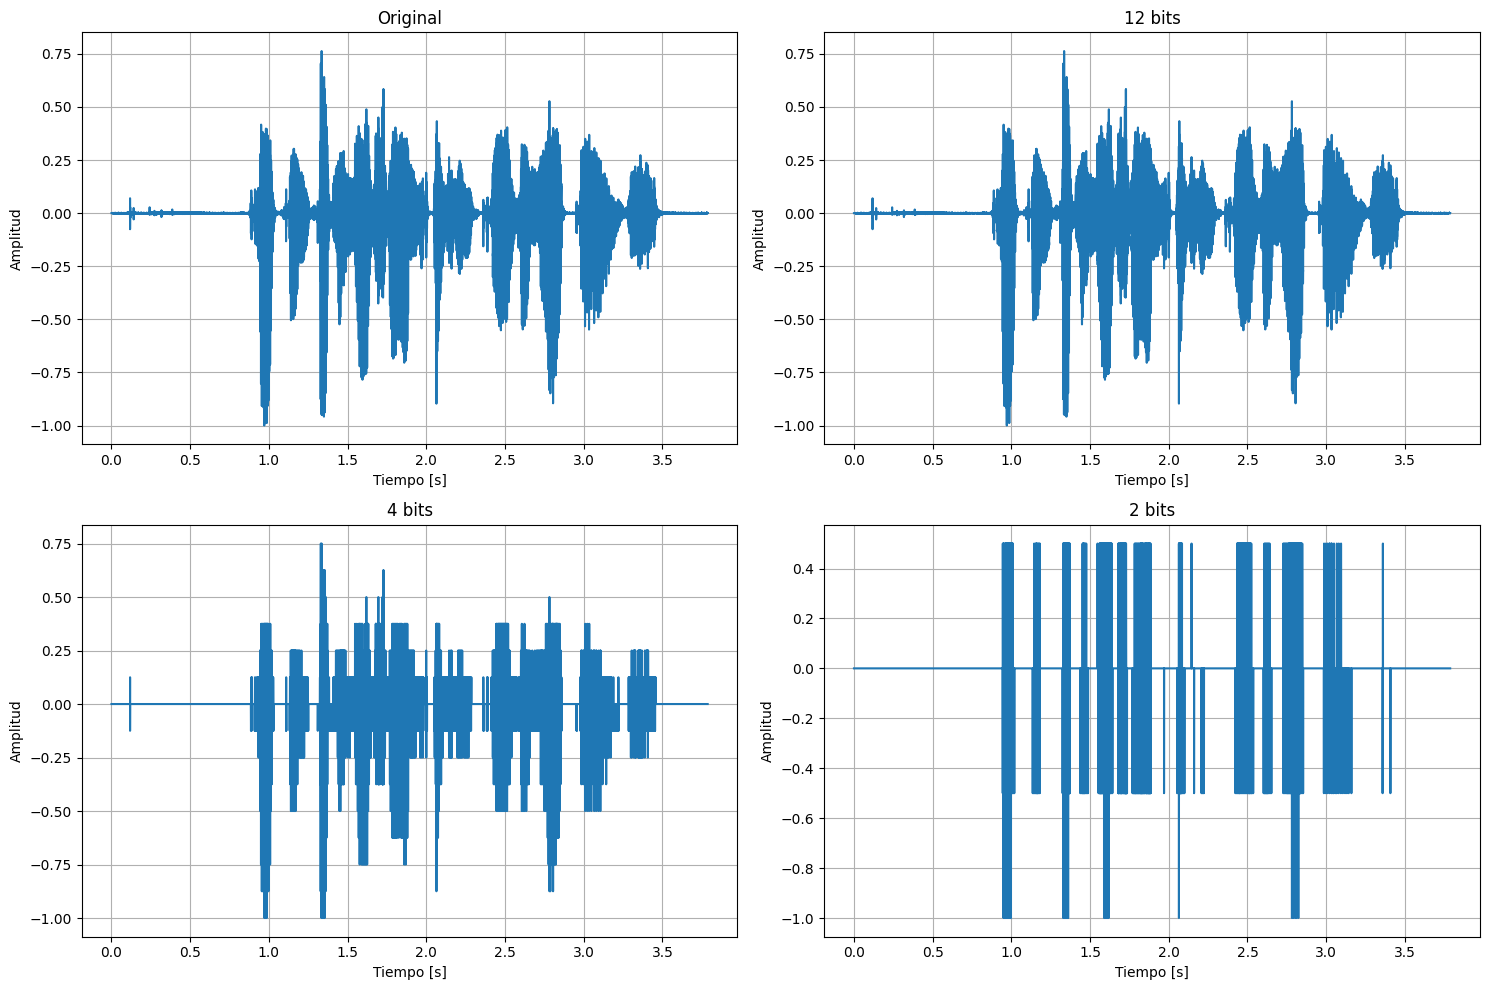

Audio original


Audio 12 bits


Audio 4 bits


Audio 2 bits


In [15]:
### 1. Use la función mostrada a continuación para re-cuantificar la señal de audio utilizada en los numerales anteriores a 2, 4 y 12 bits. Escuche y grafique las señales re-cuantificadas. Compare gráficamente cada una de las señales obtenidas con la señal original. ¿Que pudo notar?.
def fxquant (s , bit ) :
    # s : senal de entrada , debe estar normalizada entre -1 y 1
    # bit : bits de cuantizacion
    Plus1 = np . power (2 , ( bit -1) )
    X = s * Plus1
    X = np . round ( X )
    X = np . minimum ( Plus1 -1.0 , X )
    X = np . maximum ( -1.0* Plus1 , X )
    X = X / Plus1
    return X

#re-cuantificar la señal de audio a 2, 4 y 12 bits
data_2bits = fxquant(data, 2)
data_4bits = fxquant(data, 4)
data_12bits = fxquant(data, 12)

#Graficar las señales re-cuantificadas
labels = ['Original', '12 bits', '4 bits', '2 bits']
plt.figure(figsize=(15, 10))
for i, data_i in enumerate([data, data_12bits, data_4bits, data_2bits]):
    plt.subplot(2, 2, i+1)
    plt.plot(t, data_i)
    plt.title(labels[i])
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Amplitud')
    plt.grid()
plt.tight_layout()
plt.show()

#Escuchar las nuevas señales
print('Audio original')
display(Audio(data, rate=fs))
print('Audio 12 bits')
display(Audio(data_12bits, rate=fs))
print('Audio 4 bits')
display(Audio(data_4bits, rate=fs))
print('Audio 2 bits')
display(Audio(data_2bits, rate=fs))

Conclusión: A medida que se disminuye la cantidad de bits de cuantificación, la señal re-cuantificada se asemeja menos a la señal original. Esto se debe a que la cuantificación es un proceso de discretización de la señal, lo que implica una pérdida de información. A menor cantidad de bits, mayor es la pérdida de información y mayor es la distorsión de la señal original.

Hasta la cuantización de 4 bits el audio es legible, pero a partir de 2 bits la calidad del audio disminuye considerablemente y se pierde información importante del audio original.

## Transmisión Analógica vs. Digital

Se considerará el caso de la transmisión de una señal sobre un medio confinado de gran longitud, en el cual varios
repetidores serán usados para compensar la atenuación introducida por el canal.
2Cada segmento del medio introduce una atenuación 1/G, por lo cual se puede recobrar la amplitud original adi-
cionando un repetidor de ganancia G. Sin embargo, si la señal ha acumulado ruido aditivo, el ruido también será
amplificado por el repetidor. Después de N repetidores, el ruido será amplificado N veces, y la señal en el receptor
será:
x̂N (t) = x(t) + N Gσ(t)     (1)
Por otro lado si se usa una señal digital, se puede establecer un umbral después de cada repetidor para re-digitalizar
la señal y eliminar el ruido en cada etapa.

### Generación de señales analógica y digital

#### 1. Cargue la señal de audio correspondiente al ultimo número de su cédula.

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from IPython.display import Audio

# Cargar archivo de audio
fs, data = wavfile.read('0.wav')
t = np.arange(0, len(data)/fs, 1/fs)


/tmp/ipykernel_58504/2686834025.py:7: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, data = wavfile.read('0.wav')


#### 2. Para obtener la señal analógica, normalice el audio en amplitud y luego re-escale en un factor de 460. Use el siguiente código como ayuda.

In [17]:
data_norm = 1/np.max(abs(data))
data_analog = 460.0*data*data_norm


#### 3. La señal digital se obtiene aproximando cada punto de la señal analógica a un valor discreto que generalmente es un entero. Use la función round() de la librerı́a numpy para aproximar la señal analógica y obtener la señal digital.

In [18]:
#### 3. La señal digital se obtiene aproximando cada punto de la señal analógica a un valor discreto que generalmente es un entero. Use la función round() de la librerı́a numpy para aproximar la señal analógica y obtener la señal digital.

data_digital = np.round(data_analog)

#### 4. Para ver las diferencias entre la señal analógica y digital grafique, en una misma figura (subplot), 100 muestras intermedias de cada señal. ¿Se puede observar alguna diferencia entre las señales?

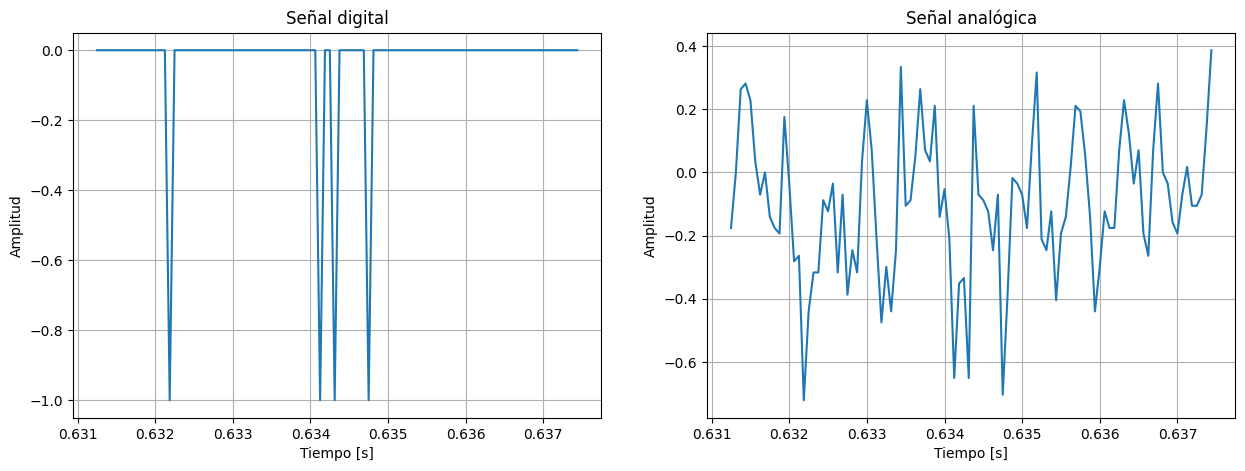

In [19]:
#### 4. Para ver las diferencias entre la señal analógica y digital grafique, en una misma figura (subplot), 100 muestras intermedias de cada señal. ¿Se puede observar alguna diferencia entre las señales?

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(t[10100:10100 + 100], data_digital[10100:10100 + 100], label='Señal digital')
plt.title('Señal digital')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(t[10100:10100 + 100], data_analog[10100:10100 + 100], label='Señal analógica')
plt.title('Señal analógica')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid()
plt.show()

Se evidencia pequeñas diferencias entre la señal analógica y la señal digital, estas diferencias se deben a la cuantización de la señal a números enteros, generando visualmente unos escalones en la señal digital.

### Transmisión

Ahora se va a definir un código que simule una transmisión por un medio confinado con N repetidores espaciados
una longitud L. Para simular la transmisión deben seguirse los siguientes pasos:

Atenuar la señal en un factor a < 1 por cada segmento de longitud L (Antes de amplificar con el repetidor).

Sumar ruido con una determinada amplitud para simular la distorsión del canal.

Compensar la perdida de amplitud en cada uno de los repetidores.

#### 1. Use la función llamada repeater(...) que recibe como entrada la señal a transmitir, la amplitud del ruido quese desea agregar y la constante de atenuación. Esta función retorna la señal afectada por el ruido, atenuada, y amplificada nuevamente.

In [20]:
#### 1. Use la función llamada repeater(...) que recibe como entrada la señal a transmitir, la amplitud del ruido quese desea agregar y la constante de atenuación. Esta función retorna la señal afectada por el ruido, atenuada, y amplificada nuevamente.

def repeater (x , noise_amplitude , attenuation ) :
    x = x * attenuation
    Noise = np . random . uniform ( - noise_amplitude , noise_amplitude , len ( x ) )
    x = x + Noise
    x = x / attenuation
    return x


#### 2. La transmisión análoga no es más que una secuencia de repetidores, la cual puede ser implementada con la siguiente función.

In [21]:
#### 2. La transmisión análoga no es más que una secuencia de repetidores, la cual puede ser implementada con la siguiente función.
def analog_tx (x , num_repeaters , noise_amplitude , attenuation ) :
    for n in range (0 , num_repeaters ) :
        x = repeater (x , noise_amplitude , attenuation )
    return x

#### 3. En el caso de la señal digital, comúnmente se vuelve a cuantificar la señal después de cada repetidor, ya que sabemos que en este caso solo tenemos valores enteros, esto es implementado a partir de la siguiente función.

In [22]:
#### 3. En el caso de la señal digital, comúnmente se vuelve a cuantificar la señal después de cada repetidor, ya que sabemos que en este caso solo tenemos valores enteros, esto es implementado a partir de la siguiente función.
def digital_tx (x , num_repeaters , noise_amplitude , attenuation ) :
    for n in range (0 , num_repeaters ) :
        x = np . round ( repeater (x , noise_amplitude , attenuation ) )
    return x

#### 4. Compare los esquemas de transmisión de las señales. Para ello defina el número de repetidores en 150, la amplitud del ruido 0.15, y la constante de atenuación en 0.35. Luego realice la transmisión de las señal análoga y digital en cada uno de sus respectivos esquemas de transmisión, y calcule la relación señal a ruido (SNR) tanto para la señal análoga como digital. ¿Qué diferencia encuentra entre las señales? Use la siguiente función para calcular la SNR:

In [33]:
#### 4. Compare los esquemas de transmisión de las señales. Para ello defina el número de repetidores en 150, la amplitud del ruido 0.15, y la constante de atenuación en 0.35. Luego realice la transmisión de las señal análoga y digital en cada uno de sus respectivos esquemas de transmisión, y calcule la relación señal a ruido (SNR) tanto para la señal análoga como digital. ¿Qué diferencia encuentra entre las señales? Use la siguiente función para calcular la SNR:

def SNR ( noisy , original ) :
    # power of the error
    err = np . var ( original - noisy )
    # power of the signal
    sig = np . var ( original )
    # SNR in dBs
    return 10 * np . log10 ( sig / err )

# Parámetros
num_repeaters = 150
noise_amplitude = 0.15
attenuation = 0.35

# Transmisión análoga
data_analog_tx = analog_tx(data_analog, num_repeaters, noise_amplitude, attenuation)
snr_analog = SNR(data_analog_tx, data_analog)

# Transmisión digital
data_digital_tx = digital_tx(data_digital, num_repeaters, noise_amplitude, attenuation)
snr_digital = SNR(data_digital_tx, data_digital)

#Imprimir valores
print('SNR señal analógica:', snr_analog)
print('SNR señal digital:', snr_digital)


SNR señal analógica: 23.334246670993938
SNR señal digital: inf


/tmp/ipykernel_58504/1163628221.py:9: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np . log10 ( sig / err )


El valor de SNR de la analogica es de 23.3 y el de la digital tiende a infinito ya que la señal digital no se ve afectada por el ruido.

#### 5. Manteniendo constantes la amplitud de ruido y la atenuación, realice un barrido del número de repetidores entre 10 y 100 (no lo haga de 1 en 1). Para cada iteración realice la transmisión análoga y digital y calcule la SNR para cada una. Al final grafique la SNR en función del número de repetidores. ¿Qué diferencia encuentra entre las gráficas obtenidas?

/tmp/ipykernel_58504/1163628221.py:9: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np . log10 ( sig / err )


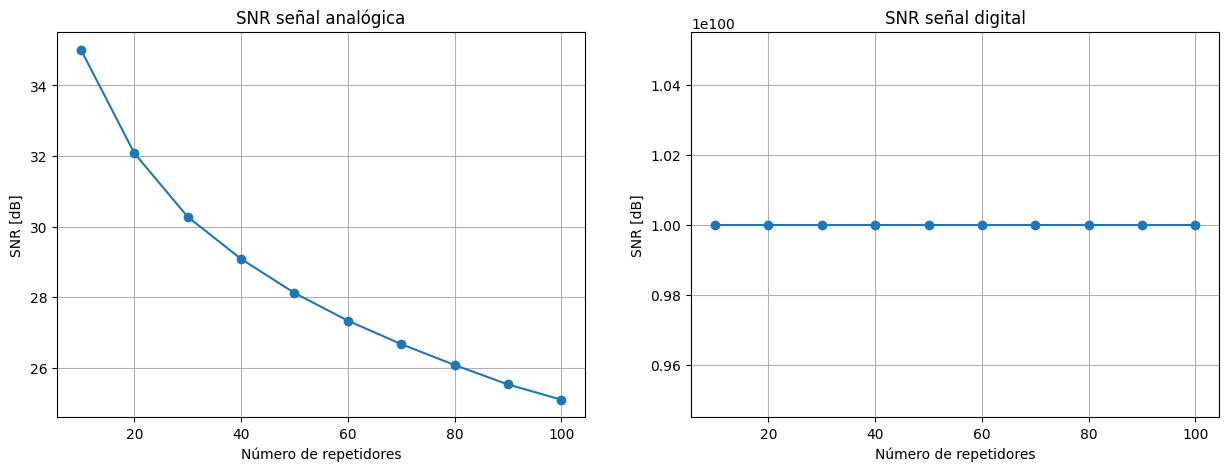

In [37]:
#### 5. Manteniendo constantes la amplitud de ruido y la atenuación, realice un barrido del número de repetidores entre 10 y 100 (no lo haga de 1 en 1). Para cada iteración realice la transmisión análoga y digital y calcule la SNR para cada una. Al final grafique la SNR en función del número de repetidores. ¿Qué diferencia encuentra entre las gráficas obtenidas?

#Barrido de número de repetidores de 10 a 100 en pasos de 10
num_repeaters = np.arange(10, 101, 10)
snr_analog = np.zeros(len(num_repeaters))
snr_digital = np.zeros(len(num_repeaters))

for i, num_repeaters_i in enumerate(num_repeaters):
    data_analog_tx = analog_tx(data_analog, num_repeaters_i, noise_amplitude, attenuation)
    snr_analog[i] = SNR(data_analog_tx, data_analog)
    
    data_digital_tx = digital_tx(data_digital, num_repeaters_i, noise_amplitude, attenuation)
    snr = SNR(data_digital_tx, data_digital)
    snr_digital[i] = 1e100 if snr == np.inf else snr

# Graficar
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(num_repeaters, snr_analog, marker='o')
plt.title('SNR señal analógica')
plt.xlabel('Número de repetidores')
plt.ylabel('SNR [dB]')
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(num_repeaters, snr_digital, marker='o')
plt.title('SNR señal digital')
plt.xlabel('Número de repetidores')
plt.ylabel('SNR [dB]')
plt.grid()


### Conclusiones

Conclusiones:

1. En este trabajo se ha realizado un análisis de señales de audio utilizando diferentes técnicas de procesamiento y cuantificación. Se ha trabajado con señales analógicas y digitales, y se ha observado cómo la cuantificación de la señal afecta la calidad y la fidelidad de la misma.

2. Se ha demostrado que a medida que se disminuye la cantidad de bits de cuantificación, la señal re-cuantificada se asemeja menos a la señal original. Esto se debe a que la cuantificación es un proceso de discretización de la señal, lo que implica una pérdida de información. A menor cantidad de bits, mayor es la pérdida de información y mayor es la distorsión de la señal original.

3. Se ha comparado la transmisión de señales analógicas y digitales a través de un medio confinado con repetidores. Se ha observado que la señal analógica se ve afectada por el ruido y la atenuación a lo largo del canal de transmisión, mientras que la señal digital se mantiene intacta, ya que se vuelve a cuantificar después de cada repetidor. Esto demuestra la ventaja de la transmisión digital en términos de la calidad y la integridad de la señal.

4. Se ha analizado la relación señal a ruido (SNR) para las señales analógicas y digitales en diferentes escenarios de transmisión. Se ha observado que la SNR de la señal analógica disminuye a medida que aumenta el número de repetidores, debido a la amplificación del ruido en cada etapa. Por otro lado, la SNR de la señal digital se mantiene constante, ya que la cuantificación elimina el ruido en cada repetidor.

5. En general, se puede concluir que la transmisión digital ofrece una mayor robustez y calidad de la señal en comparación con la transmisión analógica. La cuantificación de la señal digital permite eliminar el ruido y mantener la integridad de la señal a lo largo del canal de transmisión.

6. Este trabajo demuestra la importancia de comprender y aplicar técnicas de procesamiento y cuantificación de señales en diferentes escenarios, como la transmisión de señales de audio. Estas técnicas son fundamentales para garantizar la calidad y la fidelidad de las señales en aplicaciones de comunicaciones y procesamiento de señales.